# Objective
Categorise the risk of a patients severity of COVID reaction (Low-Medium-High) from the data that is collected when the patient enters the hospital.

# Gather Data

The data is collected in three blocks:
- 2021-04-19 _COVID_DSL_0X.CSV_
- 2020-07-20 _CDSL_0X.csv_
- 2020-04-24 _0X.csv_

Each block containing 6 different tables/.cdv-files. 

### Data Description
- The main table includes data on the admission and the patient (age and sex), data on the previous emergency if there has been one (2,226 records), data on their stay in the ICU if there has been one and records of the first and last set of emergency constants.
- The medication table shows all the medication administered to each patient during admission (more than 60,000 records), with the dates corresponding to the first and last administration of each drug, identified by their brand name and classification in the ATC5/ATC7.
- In the table of vital signs, there are all the basic records of constants (54,000 records so far) collected during admission with their date and time of registration.
- The laboratory table contains the results of the determinations (398,884 records) of all the requests made to each patient during admission and in the previous emergency, if any.
- And finally, the ICD10 coding tables show the records of diagnostic and procedural information coded according to the international ICD10 classification in its latest distributed version (does not include COVID), for the patients referred, both for episodes of hospital admission (more than 1,600) and for the emergency (more than 1,900) prior to those episodes, if any.

### Data Specification
1. **Records of Inpatients:** demographic, data on the episode of admission, data on the previous emergency episode, if any, data on the ICU, if there has been.
2. **Records of medication** prescribed and administered during admission (ICU medication is not collected).
3. **Records of constants** during admission (ICU records are not collected).
4. **Records of the results of laboratory requests** made during admission and in the previous emergency, if there have been.
5. **Records of the emergency coding**, if any, according to the ICD10.
6. **Records for inpatient coding** according to ICD10.

Translation of the headlines in each file from spanish to english is covered in the file _COVID_DATA_SAVE_LIVES_.

### Parameters of Importance
To find the response variable please find the column “Motivo_alto” in the dataset.
He recommended for example to use “nr of diagnosis” instead of a specific one.

The data believed to be of highest importance:
- Demografic
- Age (although it could be other factors like vitals instead of age)
- Gender
- Lab tests DETERMINACION/ITEM_LAB in file 4:
    PCR -- PROTEINA C REACTIVA
    LIN -- Linfocitos
    DD -- DIMERO D
    PLAQCIT -- PLAQUETAS EN CITRATO
    CREA -- CREATININA
- Vital signs


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb
import warnings

%matplotlib inline

color = sb.color_palette("Set2")[0]
palette = sb.color_palette("Set2")

# Initial Exploration
## Table 1

In [2]:
data11 = pd.read_csv('data/COVID_DSL_01.CSV', sep='|', encoding = 'ISO-8859-1')
data11.head()

,EDAD,SEX,IDINGRESO,F_INGRESO_ING,F_ALTA_ING,MOTIVO_ALTA_ING,DIAGNOSTICO_ING,F_INGRESO_URG,HORA_URG,DIAG_URG,...,GLU_ULTIMA_URG,DESTINO_URG,IDCDSL,F_ING_ANT,DIAG_ANT,RESPIRADOR,F_UCI_IN,F_UCI_OUT,UCI_DAYS,UCI_N_ING
0,55,MALE,508,2020-04-05 00:00:00,2020-04-15 00:00:00,Domicilio,COVID CONFIRMADO,05/04/2020,22:28,DIFICULTAD RESPIRATORIA,...,0,Ingreso,508,NaN,NaN,SI,NaN,NaN,NaN,NaN
1,54,MALE,509,2020-04-05 00:00:00,2020-04-14 00:00:00,Domicilio,COVID CONFIRMADO,05/04/2020,22:32,DIFICULTAD RESPIRATORIA,...,0,Ingreso,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73,MALE,510,2020-04-05 00:00:00,2020-04-20 00:00:00,Domicilio,COVID CONFIRMADO,05/04/2020,22:35,DIFICULTAD RESPIRATORIA,...,0,Ingreso,510,NaN,NaN,SI,NaN,NaN,NaN,NaN
3,90,FEMALE,511,2020-04-06 00:00:00,2020-04-07 00:00:00,Domicilio,COVID SOSPECHA,05/04/2020,23:46,DIFICULTAD RESPIRATORIA,...,0,Ingreso,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70,FEMALE,512,2020-04-06 00:00:00,2020-04-28 00:00:00,Traslado al Hospital,COVID CONFIRMADO,06/04/2020,00:57,DIFICULTAD RESPIRATORIA,...,0,Ingreso,512,NaN,NaN,SI,NaN,NaN,NaN,NaN


In [3]:
# Data Info
data11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4479 entries, 0 to 4478
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EDAD                         4479 non-null   int64  
 1   SEX                          4479 non-null   object 
 2   IDINGRESO                    4479 non-null   int64  
 3   F_INGRESO_ING                4479 non-null   object 
 4   F_ALTA_ING                   4479 non-null   object 
 5   MOTIVO_ALTA_ING              4320 non-null   object 
 6   DIAGNOSTICO_ING              4479 non-null   object 
 7   F_INGRESO_URG                4287 non-null   object 
 8   HORA_URG                     4287 non-null   object 
 9   DIAG_URG                     4287 non-null   object 
 10  ESPECIALIDAD_URGENCIA        4287 non-null   object 
 11  HORA_CONSTANTES_PRIMERA_URG  3673 non-null   object 
 12  TA_MAX_PRIMERA_URG           4479 non-null   int64  
 13  TA_MIN_PRIMERA_URG

In [4]:
# Nulls
data11.isnull().sum()

EDAD                              0
SEX                               0
IDINGRESO                         0
F_INGRESO_ING                     0
F_ALTA_ING                        0
MOTIVO_ALTA_ING                 159
DIAGNOSTICO_ING                   0
F_INGRESO_URG                   192
HORA_URG                        192
DIAG_URG                        192
ESPECIALIDAD_URGENCIA           192
HORA_CONSTANTES_PRIMERA_URG     806
TA_MAX_PRIMERA_URG                0
TA_MIN_PRIMERA_URG                0
TEMP_PRIMERA_URG                  0
FC_PRIMERA_URG                    0
SAT_02_PRIMERA_URG                0
GLU_PRIMERA_URG                   0
DIURESIS_PRIMERA_URG              0
HORA_CONSTANTES_ULTIMA_URG      193
TA_MAX_ULTIMA_URG                 0
TA_MIN_ULTIMA_URG                 0
TEMP_ULTIMA_URG                   0
FC_ULTIMA_URG                     0
SAT_02_ULTIMA_URG                 0
GLU_ULTIMA_URG                    0
DESTINO_URG                     192
IDCDSL                      

In [5]:
# Dupliactes
data11.duplicated().sum()

0

In [6]:
# Stats
data11.describe().round(1)

,EDAD,IDINGRESO,TA_MAX_PRIMERA_URG,TA_MIN_PRIMERA_URG,FC_PRIMERA_URG,SAT_02_PRIMERA_URG,GLU_PRIMERA_URG,DIURESIS_PRIMERA_URG,TA_MAX_ULTIMA_URG,TA_MIN_ULTIMA_URG,FC_ULTIMA_URG,SAT_02_ULTIMA_URG,GLU_ULTIMA_URG,IDCDSL,UCI_DAYS,UCI_N_ING
count,4479.0,4479.0,4479.0,4479.0,4479.0,4479.0,4479.0,4479.0,4479.0,4479.0,4479.0,4479.0,4479.0,4479.0,398.0,398.0
mean,67.1,2240.0,89.2,51.8,70.7,73.5,2.0,0.0,95.0,55.0,74.9,78.2,2.3,2240.0,13.6,1.7
std,17.2,1293.1,64.9,42.9,39.7,38.3,22.2,0.0,62.5,40.2,36.9,34.5,24.2,1293.1,15.8,1.1
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25%,56.0,1120.5,0.0,0.0,63.0,82.0,0.0,0.0,0.0,0.0,70.0,88.0,0.0,1120.5,2.0,1.0
50%,69.0,2240.0,118.0,68.0,83.0,93.0,0.0,0.0,120.0,70.0,85.0,94.0,0.0,2240.0,8.0,1.0
75%,80.0,3359.5,140.0,80.0,97.0,96.0,0.0,0.0,140.0,81.0,98.0,96.0,0.0,3359.5,20.0,2.0
max,106.0,4479.0,230.0,845.0,224.0,99.0,502.0,0.0,230.0,845.0,224.0,99.0,505.0,4479.0,87.0,6.0


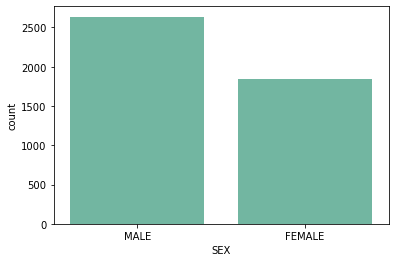

In [7]:
# Sex Description
sb.countplot(x = data11.SEX, color = color); 

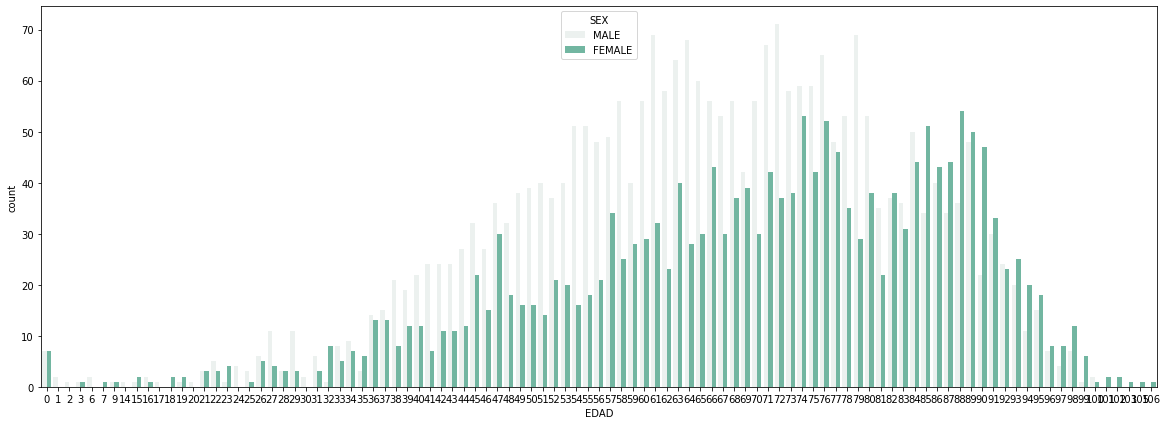

In [8]:
# Age Description
plt.figure(figsize=(20,7))
sb.countplot(data = data11, x = 'EDAD', hue = 'SEX', color = color); 

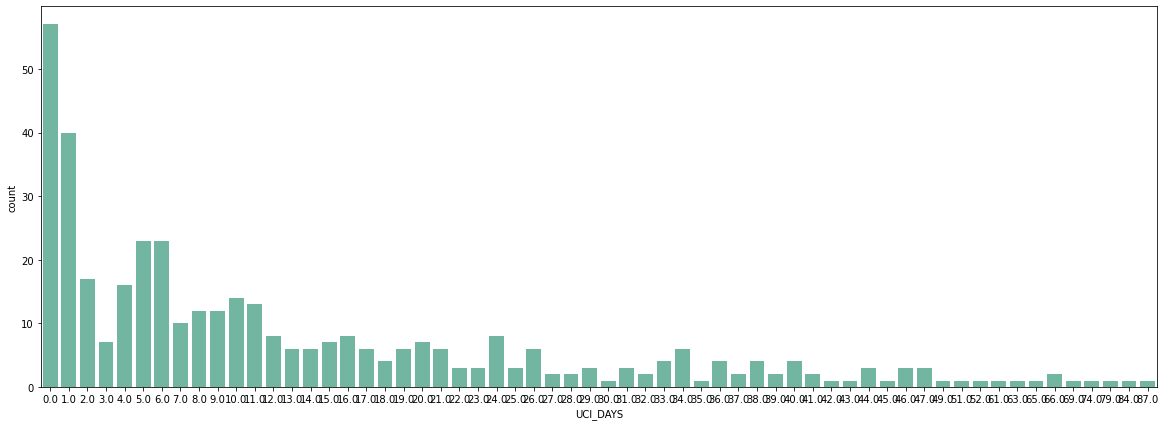

In [9]:
# ICU Days Description
plt.figure(figsize = (20,7))
sb.countplot(x = data11.UCI_DAYS, color = color); # Make new category for healing inprogress? 

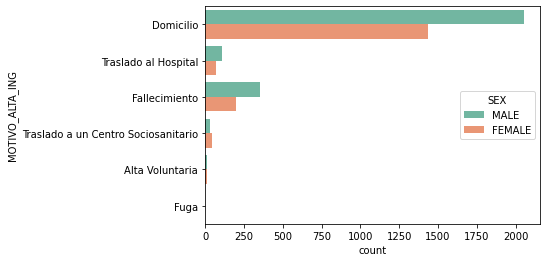

In [10]:
# Patient Prognosis/Results Description
motivo_alta_ing_dict = {'Domicilio': 'Healed', 
                    'Traslado al Hospital': 'Healing in progress',
                    'Fallecimiento': 'Death',
                    'Traslado a un Centro Sociosanitario': 'Healing in progress',
                    'Alta Voluntaria': 'Assume healed'} # Exclude Fuga and nan

sb.countplot(y = data11.MOTIVO_ALTA_ING, hue = data11.SEX, palette = palette); # Make new category for healing inprogress? 

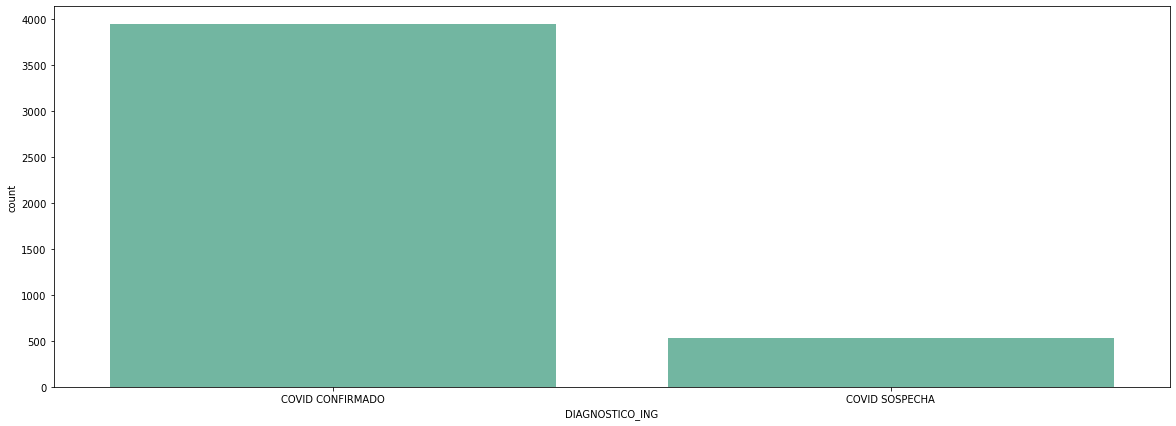

In [11]:
# Diagnostics
plt.figure(figsize = (20,7))
sb.countplot(x = data11.DIAGNOSTICO_ING, color = color); # Make new category for healing inprogress? 

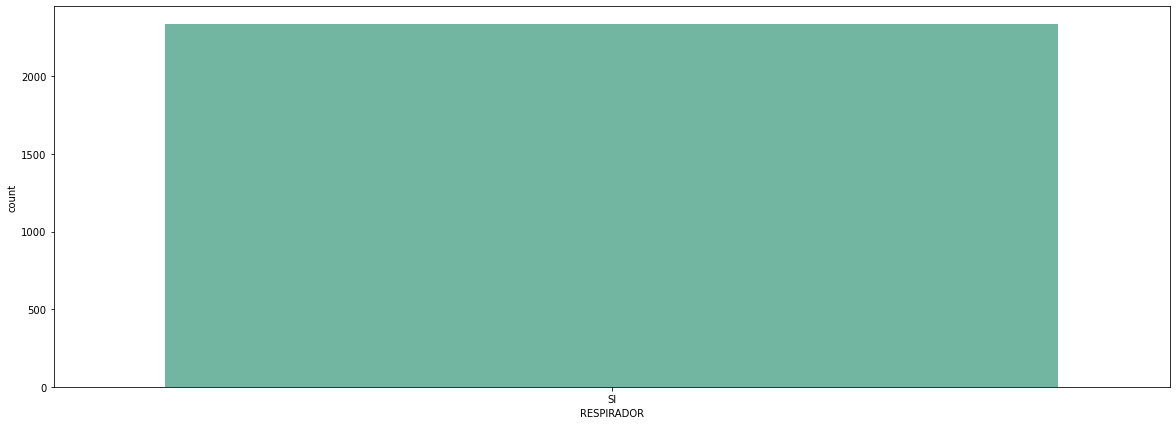

In [12]:
# Diagnostics
plt.figure(figsize = (20,7))
sb.countplot(x = data11.RESPIRADOR, color = color); # Make new category for healing inprogress? 

## Table 2 - Constants During (Non-ICU) Admission

In [13]:
data12 = pd.read_csv('data/COVID_DSL_02.CSV', sep='|', encoding = 'ISO-8859-1', low_memory = False)
data12.head()

,IDINGRESO,CONSTANTS_ING_DATE,CONSTANTS_ING_TIME,TA_MAX_ING,TA_MIN_ING,TEMP_ING,FC_HR_ING,SAT_02_ING,SAT_02_ING_OBS,GLU_GLY_ING
0,1843,2021-01-23,00:28,0,0,0,0,95,SATO2 BASAL,0
1,1764,2021-01-23,00:31,0,0,0,0,91,SATO2 RESER MAX,0
2,1761,2021-01-23,00:32,0,0,0,0,95,NaN,0
3,1792,2021-01-23,00:32,0,0,0,0,95,SATO2 GN 2 L,0
4,1225,2021-01-23,00:32,0,0,0,0,99,NaN,0


## Table 3 Diagnosis Emergency Coding

In [14]:
data13 = pd.read_csv('data/COVID_DSL_03.CSV', sep='|', encoding = 'ISO-8859-1')
data13.head()

,IDINGRESO,DIA_PPAL,DIA_02,DIA_03,DIA_04,DIA_05,DIA_06,DIA_07,DIA_08,DIA_09,DIA_10,DIA_11,DIA_12,PROC_01,PROC_02,PROC_03,PROC_04,PROC_05
0,508,B97.29,R68.89,J12.89,J12.9,Z20.828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BW03ZZZ,0BJ0XZZ,NaN,NaN,NaN
1,509,R68.89,J06.9,E11.9,B97.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BW03ZZZ,0BJ0XZZ,NaN,NaN,NaN
2,510,B97.29,J12.9,J12.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BW03ZZZ,0BJ0XZZ,NaN,NaN,NaN
3,511,J18.9,R68.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BW24ZZZ,NaN,NaN,NaN,NaN
4,512,R06.00,B34.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Nr of unique diseases
data13.DIA_PPAL.nunique() 

339

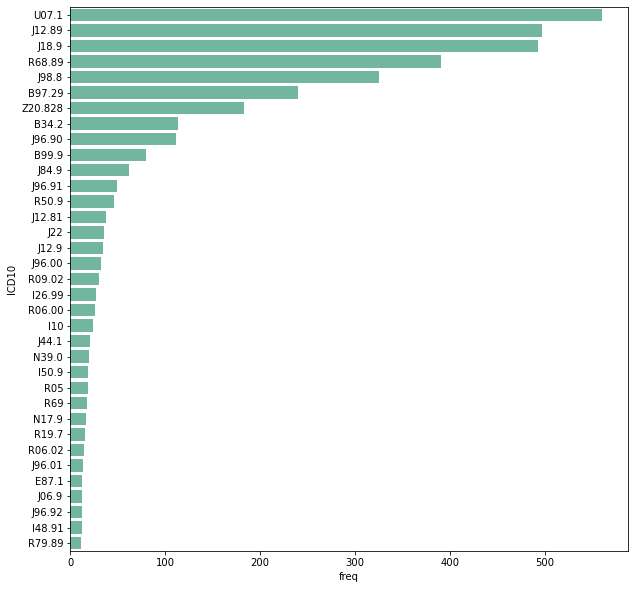

In [16]:
diagnosis = data13.DIA_PPAL.value_counts()
diagnosis = pd.DataFrame(diagnosis)
diagnosis = diagnosis[diagnosis.DIA_PPAL > 10]

# Plot top_meds
var = dict(diagnosis.DIA_PPAL)
diag_LOD = []
for key, value in var.items():
    info = {'ICD10':key, 'freq':value}
    diag_LOD.append(info)

diag = pd.DataFrame(diag_LOD)
diag.head(5)

plt.figure(figsize=(10,10));
sb.barplot(data=diag, x='freq', y='ICD10', color=color);

## Table 4 - Medications

In [17]:
data14 = pd.read_csv('data/COVID_DSL_04.CSV', sep='|', encoding = 'ISO-8859-1')
data14.head()

,IDINGRESO,DRUG_COMERCIAL_NAME,ID_ATC5,ATC5_NAME,ID_ATC7,ATC7_NAME,DAILY_AVRG_DOSE,DRUG_START_DATE,DRUG_END_DATE
0,2790,BUSCAPINA amp 20 mg/1 mL,A03BB,"ALCALOIDES SEMISINTÉTICOS DE LA BELLADONA, COM...",A03BB01,BUTILESCOPOLAMINA,3,2020-03-26,2020-03-29
1,2790,FERO-GRADUMET comp 325 mg (105 mg Fe),B03AA,"HIERRO BIVALENTE, PREPARADOS ORALES",B03AA07,FERROSO SULFATO,1,2020-03-23,2020-03-23
2,2790,OXIGENO PLANTA,V03AN,GASES MEDICINALES,V03AN01,OXÍGENO,22,2020-03-23,2020-04-01
3,2790,PARACETAMOL sol 1 g/100 mL,N02BE,ANILIDAS,N02BE01,PARACETAMOL,3,2020-03-23,2020-04-01
4,2791,ALCOHOL 70º 1L,D08AX,OTROS ANTISÉPTICOS Y DESINFECTANTES,D08AX08,ETANOL,3,2020-03-23,2020-03-30


In [18]:
# Nr of medications
data14.ATC7_NAME.nunique()


545

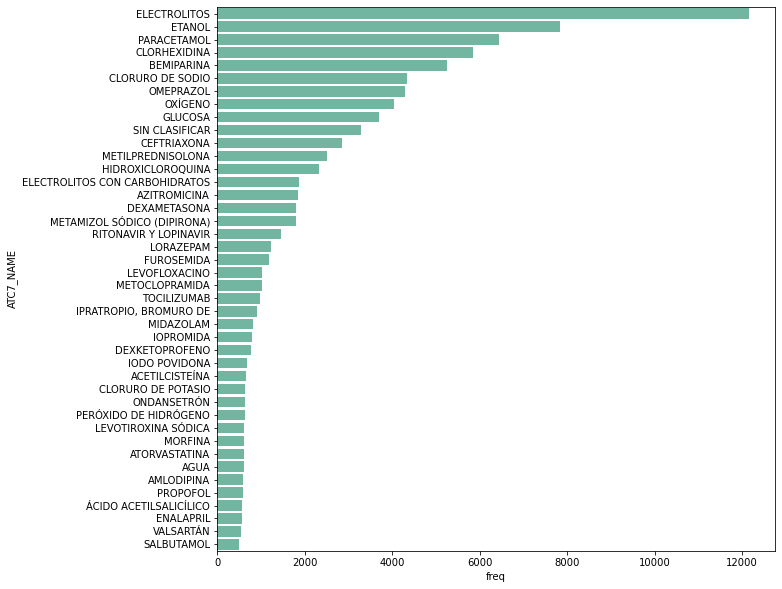

In [19]:
# Nr of each medication
med_count = pd.DataFrame(data14.ATC7_NAME.value_counts())
top_meds = med_count[med_count.ATC7_NAME > 500]

# Plot top_meds
var = dict(top_meds.ATC7_NAME)
diag_LOD = []
for key, value in var.items():
    info = {'ATC7_NAME':key, 'freq':value}
    diag_LOD.append(info)

diag = pd.DataFrame(diag_LOD)
diag.head(5)

plt.figure(figsize=(10,10));
sb.barplot(data=diag, x='freq', y='ATC7_NAME', color=color);

## Table 5 - Diagnosis Inpatient Encoding


In [20]:
data15 = pd.read_csv('data/COVID_DSL_05.CSV', sep='|', encoding = 'ISO-8859-1')
data15.head()


,DIA_PPAL,POAD_PPAL,DIA_02,POAD_02,DIA_03,POAD_03,DIA_04,POAD_04,DIA_05,POAD_05,...,PROC_18,PROC_19,PROC_20,NEO_01,NEO_02,NEO_03,NEO_04,NEO_05,NEO_06,IDINGRESO
0,C34.91,S,C78.02,S,C78.7,S,C77.8,S,J96.00,S,...,F07Z9ZZ,02HV33Z,4A033R1,8041/39,8041/6,NaN,NaN,NaN,NaN,695
1,J00,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,698
2,B34.9,S,Z20.828,S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701
3,J12.89,S,B97.29,S,J96.00,S,E03.9,S,Z90.710,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,702
4,J12.89,S,B97.29,S,M81.0,S,Z79.83,E,N28.1,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712


In [21]:
# Nr of unique diseases
data15.DIA_PPAL.nunique() 



268

In [22]:
diagnosis = pd.DataFrame(data15.DIA_PPAL.value_counts())
top_diagnosis = diagnosis[diagnosis.DIA_PPAL > 10]
top_diagnosis


,DIA_PPAL
J12.89,1596
U07.1,1499
J18.9,337
J98.8,211
J44.0,68
J84.9,48
J22,33
N39.0,28
J43.9,25
J47.0,24


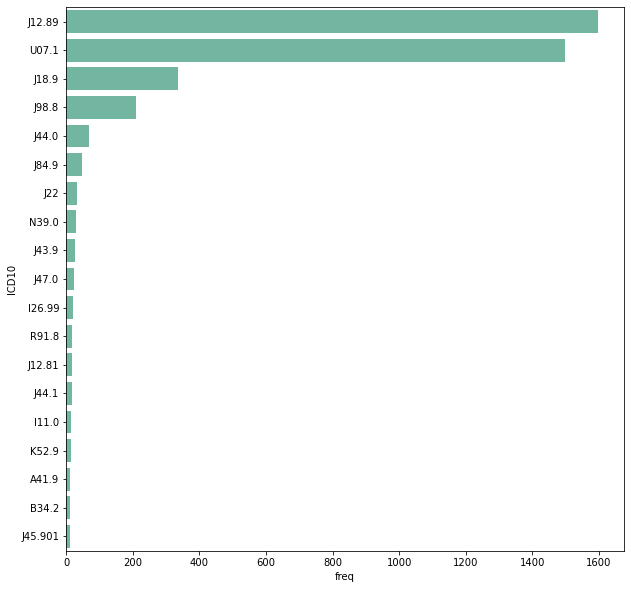

In [23]:
# Plot top_diagnosis
var = dict(top_diagnosis.DIA_PPAL)
diag_LOD = []
for key, value in var.items():
    info = {'ICD10':key, 'freq':value}
    diag_LOD.append(info)

diag = pd.DataFrame(diag_LOD)
diag.head(5)

plt.figure(figsize=(10,10));
sb.barplot(data=diag, x='freq', y='ICD10', color=color);

## Table 6 - Labworks

In [24]:
# Lab table
warnings.simplefilter('ignore')

data16 = pd.read_csv('data/COVID_DSL_06.CSV', sep=',', encoding = 'Utf-16', error_bad_lines = False)
data16.head()



b'Skipping line 100: expected 8 fields, saw 14\nSkipping line 2416: expected 8 fields, saw 9\nSkipping line 2542: expected 8 fields, saw 9\nSkipping line 2794: expected 8 fields, saw 9\nSkipping line 3293: expected 8 fields, saw 10\nSkipping line 8320: expected 8 fields, saw 14\nSkipping line 8348: expected 8 fields, saw 14\nSkipping line 8403: expected 8 fields, saw 14\nSkipping line 8901: expected 8 fields, saw 11\nSkipping line 9342: expected 8 fields, saw 9\nSkipping line 12227: expected 8 fields, saw 9\nSkipping line 13511: expected 8 fields, saw 9\nSkipping line 15227: expected 8 fields, saw 9\nSkipping line 15323: expected 8 fields, saw 9\nSkipping line 15888: expected 8 fields, saw 9\nSkipping line 16078: expected 8 fields, saw 10\nSkipping line 16966: expected 8 fields, saw 9\nSkipping line 17587: expected 8 fields, saw 9\nSkipping line 17898: expected 8 fields, saw 13\nSkipping line 18840: expected 8 fields, saw 13\nSkipping line 22366: expected 8 fields, saw 9\nSkipping line

,IDINGRESO,LAB_NUMBER,LAB_DATE,TIME_LAB,ITEM_LAB,VAL_RESULT,UD_RESULT,REF_VALUES
0,1,I-1,09-12-2020,00:00,G-CORONAV (RT-PCR) -- Tipo de muestra: EXUDADO,Se detecta,NaN,NaN
1,22,I-1,18-12-2020,00:00,SO2C -- GASOMETRIA ARTERIAL,98.0,%,(94.0 - 100.0)
2,24,I-2,21-12-2020,00:00,G-CORONAV (RT-PCR) -- Tipo de muestra: Exudado...,No se detecta,NaN,NaN
3,32,I-1,18-12-2020,00:00,BT -- BILIRRUBINA TOTAL,0.42,mg/dL,<1.2
4,32,I-1,18-12-2020,00:00,HCTO -- SISTEMATICO DE SANGRE,40.9,%,(40.0 - 52.0)


In [25]:
data16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219091 entries, 0 to 219090
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   IDINGRESO   219091 non-null  int64 
 1   LAB_NUMBER  219091 non-null  object
 2   LAB_DATE    219091 non-null  object
 3   TIME_LAB    219091 non-null  object
 4   ITEM_LAB    219091 non-null  object
 5   VAL_RESULT  217407 non-null  object
 6   UD_RESULT   202137 non-null  object
 7   REF_VALUES  210247 non-null  object
dtypes: int64(1), object(7)
memory usage: 13.4+ MB


In [26]:
# Duplicates
data16.duplicated().sum()

0

In [27]:
# Nr of unique lab tests
data16.ITEM_LAB.nunique()

440

In [28]:
# Lab tests
suggested_tests = ['PCR -- PROTEINA C REACTIVA',
                 'LIN -- Linfocitos',
                 'DD -- DIMERO D',
                 'PLAQCIT -- PLAQUETAS EN CITRATO',
                 'CREA -- CREATININA']

# Relevant lab tests
present_tests = []

for i in data16.ITEM_LAB.unique():
    if 'PCR -- PROTEINA C REACTIVA' in i:
        present_tests.append(i)
    
    if 'LIN -- S' in i:
        present_tests.append(i)
        
    if 'DD -- D' in i:
        present_tests.append(i)
        
    if 'PLAQ -- S' in i:
        #print(i)
        present_tests.append(i)
        
    if 'CREA -- CR' in i: # CK -- C
        print(i)
        present_tests.append(i)

print(present_tests)

CREA -- CREATININA
['PLAQ -- SISTEMATICO DE SANGRE', 'PCR -- PROTEINA C REACTIVA', 'CREA -- CREATININA', 'LIN -- SISTEMATICO DE SANGRE', 'DD -- DIMERO D']


In [36]:
# Filter df to include only relevant lab tests

cond0 = data16.ITEM_LAB == present_tests[0]
cond1 = data16.ITEM_LAB == present_tests[1]
cond2 = data16.ITEM_LAB == present_tests[2]
cond3 = data16.ITEM_LAB == present_tests[3]
cond4 = data16.ITEM_LAB == present_tests[4]
allcond = cond0 | cond1 | cond2 | cond3 | cond4

lab_data = data16[allcond]
lab_data

,IDINGRESO,LAB_NUMBER,LAB_DATE,TIME_LAB,ITEM_LAB,VAL_RESULT,UD_RESULT,REF_VALUES
25,101,I-1,21-12-2020,00:00,PLAQ -- SISTEMATICO DE SANGRE,290.0,x10e3/µL,(150.0 - 450.0)
37,157,I-2,29-01-2021,00:00,PCR -- PROTEINA C REACTIVA,9.52,mg/L,<5
38,157,I-2,29-01-2021,00:00,PLAQ -- SISTEMATICO DE SANGRE,257.0,x10e3/µL,(150.0 - 450.0)
40,162,I-4,11-01-2021,00:00,CREA -- CREATININA,0.56,mg/dL,(0.7 - 1.2)
43,162,I-4,11-01-2021,00:00,LIN -- SISTEMATICO DE SANGRE,0.73,x10e3/µL,(1.2 - 3.4)
...,...,...,...,...,...,...,...,...
219027,4248,I-3,05-11-2020,00:00,PCR -- PROTEINA C REACTIVA,30.52,mg/L,<5
219028,4248,I-3,05-11-2020,00:00,PLAQ -- SISTEMATICO DE SANGRE,218.0,x10e3/µL,(150.0 - 450.0)
219042,4285,I-3,08-11-2020,00:00,DD -- DIMERO D,1125.0,ng/mL,<500
219067,4373,I-1,25-11-2020,00:00,LIN -- SISTEMATICO DE SANGRE,2.69,x10e3/µL,(1.2 - 3.4)


In [38]:
# Check of selected lab tests
lab_data.ITEM_LAB.unique()

array(['PLAQ -- SISTEMATICO DE SANGRE', 'PCR -- PROTEINA C REACTIVA',
       'CREA -- CREATININA', 'LIN -- SISTEMATICO DE SANGRE',
       'DD -- DIMERO D'], dtype=object)